In [1]:
#インポート

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
#データをインストール

df = pd.read_csv('house_price_train.csv')

In [3]:
#DataFrameを作成

df_data0 = df.loc[:,['1stFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtUnfSF','GarageArea',
                     'GrLivArea', 'LotArea', 'TotalBsmtSF', 'YearBuilt',
                     'GarageYrBlt', 'LotFrontage', 'MSSubClass', 'OpenPorchSF',
                     'TotRmsAbvGrd','YearRemodAdd', 'YrSold']]
df_target = df.loc[:,['SalePrice']]
df_add0 = pd.concat([df_data0, df_target], axis=1)

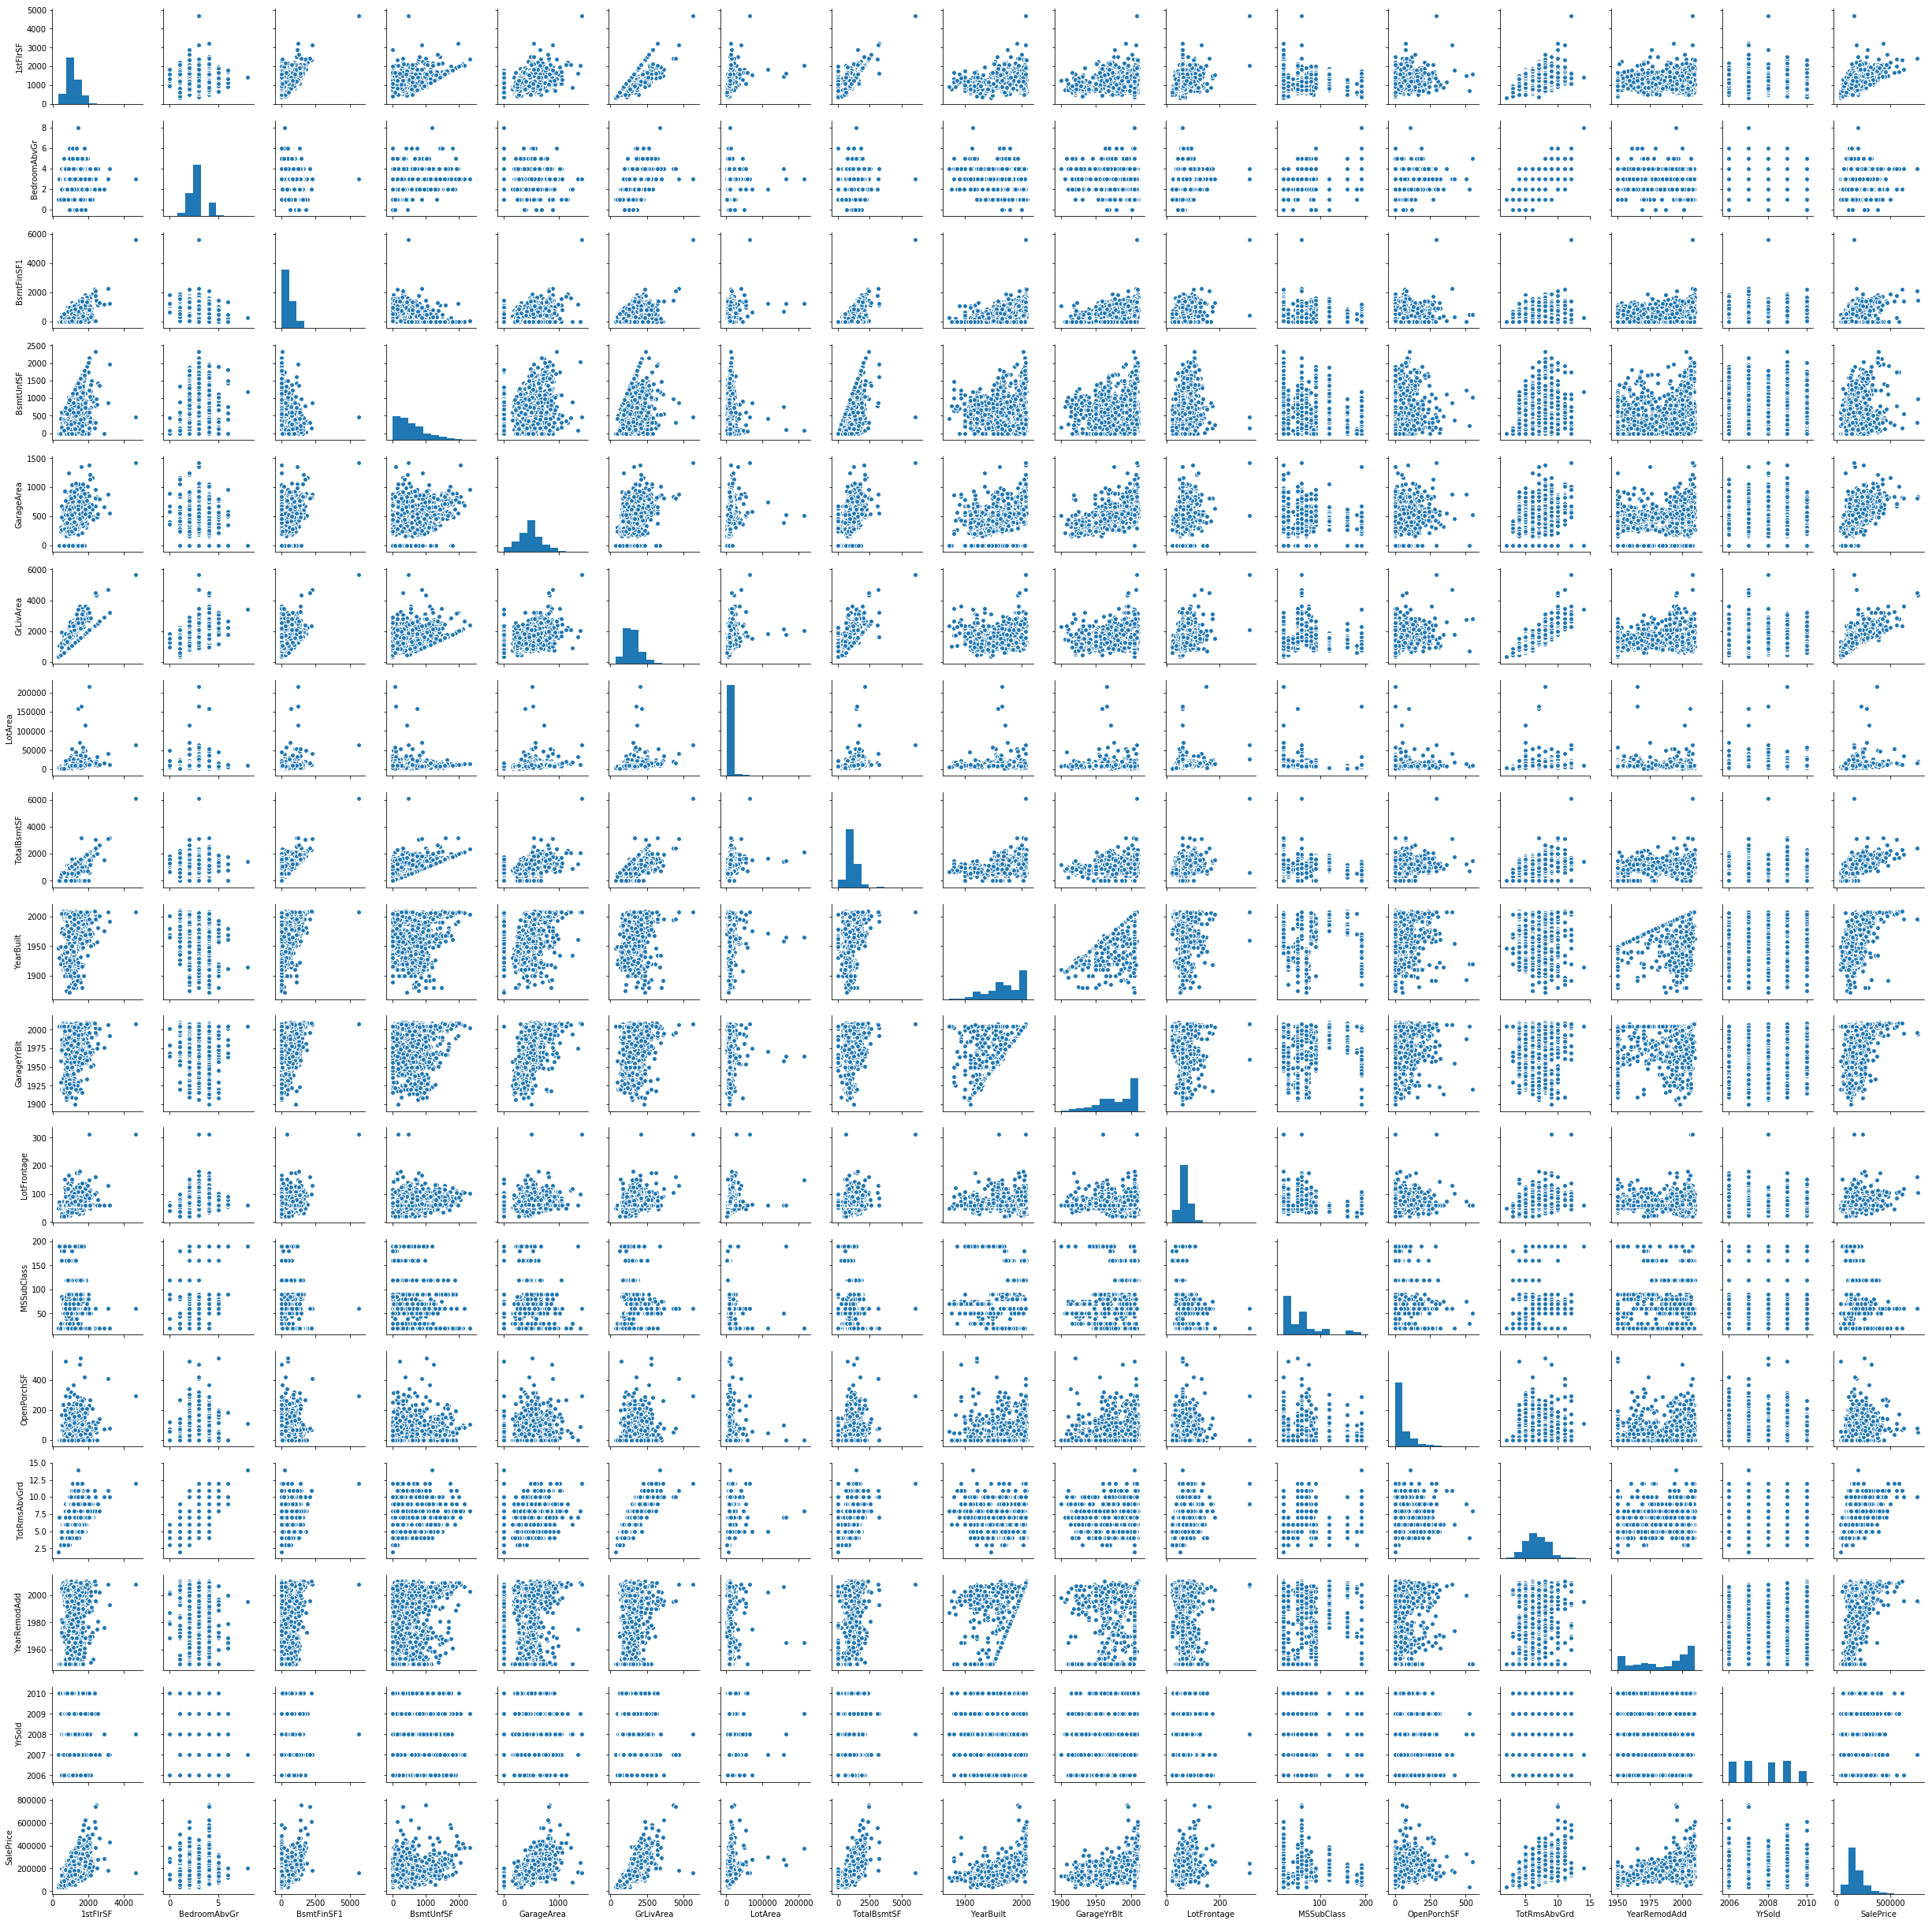

In [4]:
#相関関係

import seaborn as sns

sns.pairplot(df_add0, size=2.0)
plt.show()

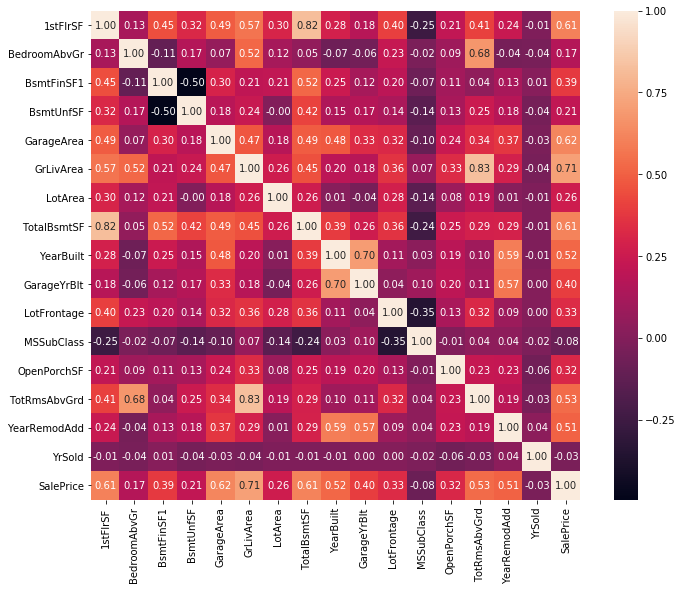

In [5]:
#相関係数

plt.figure(figsize=(12,9))
sns.heatmap(df_add0.corr(), annot=True, square=True, fmt='.2f')
plt.show()

In [10]:
#標準化

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data0_std = sc.fit_transform(df_data0)
target_std = sc.fit_transform(df_target)

#重回帰分析
from sklearn.linear_model import LinearRegression
lr_std0 = LinearRegression()
lr_std0.fit(data0_std, target_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
#標準化偏回帰変数

def set_std(coef, columns):
    dic = {}
    for (i,j) in zip(coef, columns):
        dic[j]=i
    return sorted(dic.items(), key=lambda x:x[1], reverse=True)

In [12]:
set_std(lr_std0.coef_[0], df_data0.columns)

[('GrLivArea', 0.50599332735719293),
 ('YearBuilt', 0.19856701047531319),
 ('TotalBsmtSF', 0.13644295413567573),
 ('YearRemodAdd', 0.13120263843392249),
 ('GarageArea', 0.13002996555964311),
 ('TotRmsAbvGrd', 0.10378089059050866),
 ('BsmtFinSF1', 0.090735392515011101),
 ('LotArea', 0.050995260798001353),
 ('BsmtUnfSF', 0.0040414781549555634),
 ('GarageYrBlt', 0.0030191822842909888),
 ('OpenPorchSF', 0.0012942696637163187),
 ('YrSold', -0.011616569888824015),
 ('LotFrontage', -0.026915780783184198),
 ('1stFlrSF', -0.039542492415786265),
 ('MSSubClass', -0.10120906103352226),
 ('BedroomAbvGr', -0.15027161765339703)]

In [13]:
#重回帰、正則化

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

df_data0_train, df_data0_test, df_target_train, df_target_test = train_test_split(df_data0,
                                                                                  df_target,
                                                                                  test_size = 0.3, 
                                                                                  random_state = 4)

lr_data0 = LinearRegression()
ridge_data0 = Ridge(alpha=500)
lasso_data0 = Lasso(alpha=500)

lr_data0.fit(df_data0_train, df_target_train)
ridge_data0.fit(df_data0_train, df_target_train)
lasso_data0.fit(df_data0_train, df_target_train)

Lasso(alpha=500, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [14]:
print(lr_data0.score(df_data0_train, df_target_train))
print(lr_data0.score(df_data0_test, df_target_test))
print(ridge_data0.score(df_data0_train, df_target_train))
print(ridge_data0.score(df_data0_test, df_target_test))
print(lasso_data0.score(df_data0_train, df_target_train))
print(lasso_data0.score(df_data0_test, df_target_test))

0.732560543627
0.796980126828
0.728498543347
0.792665040042
0.732303224287
0.797321610015


In [15]:
#相関係数or標準化偏回帰係数が高い説明変数で重回帰、正則化

df_data3 = df.loc[:,['1stFlrSF', 'GarageArea','GrLivArea', 'TotalBsmtSF',
                     'YearBuilt', 'TotRmsAbvGrd', 'YearRemodAdd']].values

df_data3_train, df_data3_test, df_target_train, df_target_test = train_test_split(df_data3,
                                                                                  df_target, 
                                                                                  test_size = 0.3,
                                                                                  random_state = 6)

lr_data3 = LinearRegression()
ridge_data3 = Ridge(alpha=1000)
lasso_data3 = Lasso(alpha=1000)

lr_data3.fit(df_data3_train, df_target_train)
ridge_data3.fit(df_data3_train, df_target_train)
lasso_data3.fit(df_data3_train, df_target_train)

Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [16]:
print(lr_data3.score(df_data3_train, df_target_train))
print(lr_data3.score(df_data3_test, df_target_test))
print(ridge_data3.score(df_data3_train, df_target_train))
print(ridge_data3.score(df_data3_test, df_target_test))
print(lasso_data3.score(df_data3_train, df_target_train))
print(lasso_data3.score(df_data3_test, df_target_test))

0.726099858327
0.724444611054
0.725987706438
0.725036467349
0.725884457359
0.72519470686


In [41]:
from sklearn.preprocessing import PolynomialFeatures

yb = df.loc[:,['YearBuilt']].values
gla = df.loc[:,['GrLivArea']].values
ga = df.loc[:,['GarageArea']].values
quad = PolynomialFeatures(degree=2)
quad_yb = quad.fit_transform(yb)

quad_add = np.hstack((quad_yb, gla, ga))

quad_add_train, quad_add_test, df_target_train, df_target_test = train_test_split(quad_add,
                                                                                  df_target, 
                                                                                  test_size = 0.3,
                                                                                  random_state = 7)

lr_quad = LinearRegression()
ridge_quad = Ridge(alpha=1000)

lr_quad.fit(quad_add_train, df_target_train)
ridge_quad.fit(quad_add_train, df_target_train)

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [42]:
print(lr_quad.score(quad_add_train, df_target_train))
print(lr_quad.score(quad_add_test, df_target_test))
print(ridge_quad.score(quad_add_train, df_target_train))
print(ridge_quad.score(quad_add_test, df_target_test))

0.679520605894
0.698500698525
0.671028909372
0.702557203108


In [84]:
#df_data3について主成分分析

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
data3_std = std.fit_transform(df_data3)

from sklearn.decomposition import PCA
pca = PCA(n_components=7)
data3_pca = pca.fit_transform(data3_std)

#累積寄与率を出力
print(np.cumsum(pca.explained_variance_ratio_))

[ 0.49934032  0.69290275  0.82701713  0.90430516  0.95578697  0.97889433
  1.        ]


In [94]:
pca_data = data3_pca[:,[0,4]]

pca_data_train, pca_data_test, df_target_train, df_target_test = train_test_split(pca_data,
                                                                                  df_target,
                                                                                  test_size = 0.3,
                                                                                  random_state = 4)
                                                                                 

lr_pca = LinearRegression()
lr_pca.fit(pca_data_train, df_target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [95]:
print(lr_pca.score(pca_data_train, df_target_train))
print(lr_pca.score(pca_data_test, df_target_test))

0.690209135365
0.718144503455


In [98]:
#df_data0について主成分分析

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
data0_std = std.fit_transform(df_data0)

from sklearn.decomposition import PCA
pca = PCA(n_components=len(df_data0.columns))
data0_pca = pca.fit_transform(data0_std)

#累積寄与率を出力
print(np.cumsum(pca.explained_variance_ratio_))

[ 0.28568099  0.42325828  0.53607233  0.62381174  0.68743382  0.74213396
  0.79488756  0.84401497  0.88081402  0.91335823  0.94281798  0.96279898
  0.97790225  0.98929809  0.99747437  1.        ]


In [107]:
pca_data0 = data0_pca[:,[0,8]]

pca_data0_train, pca_data0_test, df_target_train, df_target_test = train_test_split(pca_data0,
                                                                                  df_target,
                                                                                  test_size = 0.3,
                                                                                  random_state = 9)
                                                                                 

lr_pca_data0 = LinearRegression()
lr_pca_data0.fit(pca_data0_train, df_target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [108]:
print(lr_pca.score(pca_data0_train, df_target_train))
print(lr_pca.score(pca_data0_test, df_target_test))

0.608267663193
0.728891584019
